### Get session info

In [1]:
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/NMJ_imaging/uf-GCaMP/'
# imgPath = '/Users/zhengj10/Desktop/Recent data/NMJ/ufGCaMP/'
params = {
          'frameInterval': 128.5,
          'shutterCloseFrames': 0, # No. of frames before shutter open
          'truncatedFrames': 290,    # No. of frames to be further deleted for rendering 1s baseline in plot
          'stimStart': 3527.8       # Time (in ms) when electrical stimulation is delivered
         }


### Import modules

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import scipy.io as sio


### Data sorting

In [3]:
# df = pd.read_excel(imgPath + 'summary_low_affinity_GCaMP_1-160Hz.xlsx', index_col = 0)
df = pd.read_excel(imgPath + 'summary_uf-GCaMP_tdtomato_1-320Hz.xlsx', index_col = 0)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 10)
df


,Date,Larva_ID,Sensor,Gender,FOV_ID,Side,Segment,Muscle_No,No_boutons,Power,Mother_line,Father_line,Codon optimization,Balancer,Fb,F0,F0_minus_Fb,F0_all_boutons,F0_minus_Fb_all_boutons
1,210111,Larva_1,GCaMP456,F,FOV1,R,A4,13,NaN,70,pJFRC2...,pGP-20...,codon ...,No,166.63...,193.32...,26.688654,[189.0...,[22.39...
2,210111,Larva_2,GCaMP455,F,FOV1,R,A5,13,NaN,70,pJFRC2...,pGP-20...,codon ...,No,156.82...,202.88...,46.067539,[188.7...,[31.88...
3,210111,Larva_3,GCaMP7f,F,FOV1,L,A5,13,NaN,70,pJFRC2...,UAS-GC...,codon ...,No,147.23...,252.49...,105.26...,[278.1...,[130.9...
4,210111,Larva_4,GCaMP712,F,FOV1,L,A5,13,NaN,70,pJFRC2...,pGP-20...,codon ...,No,161.24...,180.15...,18.914881,[177.4...,[16.19...
5,210111,Larva_5,GCaMP456,F,FOV1,L,A5,13,NaN,70,pJFRC2...,pGP-20...,non co...,No,146.55...,186.85...,40.296612,[180.3...,[33.78...
6,210111,Larva_6,GCaMP455,F,FOV1,L,A5,13,NaN,70,pJFRC2...,pGP-20...,non co...,No,150.40...,186.33...,35.925668,[188.3...,[37.98...
7,210112,Larva_1,GCaMP543,F,FOV1,L,A5,13,NaN,70,pJFRC2...,pGP-20...,codon ...,No,169.62...,175.73...,6.115192,[175.5...,[5.918...
8,210112,Larva_2,GCaMP640,F,FOV1,R,A5,13,NaN,70,pJFRC2...,pGP-20...,codon ...,No,142.33...,153.78...,11.453091,[150.4...,[ 8.12...
9,210112,Larva_3,GCaMP688,F,FOV1,R,A4,13,NaN,70,pJFRC2...,pGP-20...,codon ...,No,157.41...,209.46...,52.048856,[208.7...,[51.29...
10,210112,Larva_4,GCaMP707,F,FOV1,L,A5,13,NaN,70,pJFRC2...,pGP-20...,codon ...,No,154.16...,182.92...,28.760055,[182.6...,[28.52...


### Group dff traces by sensor type

In [4]:
# df_sorted = df[(df.Mother_line=='57C10-Gal4') & (df.Father_line_landing_site=='su(Hw)attP5')]
# df_sorted = df[(df.Mother_line=='nsyb-LexA') & (df.Father_line_landing_site=='su(Hw)attP8')]
# df_sorted = df[(df.Mother_line=='nsyb-LexA') & (df.Father_line_landing_site=='VK00005')]
# df_sorted = df[(df.Mother_line=='57C10-Gal4') & (df.Father_line_landing_site=='To be updated')]
# df_sorted = df[df.Sensor == 'GCaMP7f']

df_sorted = df

sensorTypes = df_sorted.Sensor.unique()

# print('Total sensors: %d' %len(sensorTypes))
dffAll = {}
f0All = {}

# for opt in ['codon optimized','non codon optimized']:
for sensorType in(sensorTypes):
    print(sensorType)
    
    if sensorType in ['GCaMP456','GCaMP455','GCaMP543']:
#         print(sensorType)
        df_sensor = df_sorted[(df_sorted.Sensor == sensorType)&(df_sorted['Codon optimization'] == 'codon optimized')]
    else:
        df_sensor = df_sorted[df_sorted.Sensor == sensorType]

#     df_sensor = df_sorted[df_sorted['Codon optimization'] == opt]
    
    dffList = []
    f0List = []
    for index, row in df_sensor.iterrows():

        if row['Date'] == 210112 and row['Larva_ID']=='Larva_2':
            print(sensorType)
            continue
            
        matFile = os.path.join(imgPath, str(row['Date']), row['Larva_ID'], row['FOV_ID'], 'summary/_dff.mat')
        if not os.path.exists(matFile):
            print(sensorType)
            print("no mat file found!")
            continue
        dffSingleFOV = sio.loadmat(matFile)
        dffArray = dffSingleFOV['dff']
#         print dffArray.shape
#         dffList.append(dffArray[:7,:,:])
        dffList.append(dffArray)
        matFile = os.path.join(imgPath, str(row['Date']), row['Larva_ID'], row['FOV_ID'], 'summary/_f0.mat')
        f0SingleFOV = sio.loadmat(matFile)
        f0Array = f0SingleFOV['f0']
        f0List.append(f0Array)
    
    dffAllROIs = np.concatenate(dffList, axis=1)
    f0AllROIs = np.concatenate(f0List, axis=1)
    print (dffAllROIs.shape)
    dffAll[sensorType] = dffAllROIs
    f0All[sensorType] = f0AllROIs
    

#     dffAll[opt] = dffAllROIs
#     f0All[opt] = f0AllROIs


GCaMP456
(9, 27, 1800)
GCaMP455
(9, 10, 1800)
GCaMP7f
(9, 21, 1800)
GCaMP712
(9, 11, 1800)
GCaMP543
(9, 9, 1800)
GCaMP640
GCaMP640
(9, 3, 1800)
GCaMP688
(9, 25, 1800)
GCaMP707
(9, 8, 1800)
GCaMP686
(9, 25, 1800)
XCaMP
XCaMP
no mat file found!
(9, 4, 1800)


In [5]:
# df_sorted
# dffSingleFOV.keys()

In [6]:
df_sorted[(df_sorted.Sensor == 'GCaMP7f')&(df_sorted['Codon optimization']=='codon optimized')]

,Date,Larva_ID,Sensor,Gender,FOV_ID,Side,Segment,Muscle_No,No_boutons,Power,Mother_line,Father_line,Codon optimization,Balancer,Fb,F0,F0_minus_Fb,F0_all_boutons,F0_minus_Fb_all_boutons
3,210111,Larva_3,GCaMP7f,F,FOV1,L,A5,13,NaN,70,pJFRC2...,UAS-GC...,codon ...,No,147.23...,252.49...,105.26...,[278.1...,[130.9...
14,210125,Larva_1,GCaMP7f,F,FOV1,R,A4,13,NaN,70,pJFRC2...,UAS-GC...,codon ...,No,203.62...,337.37...,133.75...,[299.9...,[ 96.3...
26,210304,Larva_1,GCaMP7f,F,FOV1,L,A4,13,NaN,70,pJFRC2...,UAS-GC...,codon ...,No,155.26...,235.63...,80.371325,[204.9...,[49.69...
30,210413,Larva_1,GCaMP7f,F,FOV1,L,A5,13,NaN,70,pJFRC2...,UAS-GC...,codon ...,No,216.93...,337.91...,120.98...,[371.4...,[154.5...
34,210414,Larva_1,GCaMP7f,F,FOV1,R,A5,13,NaN,70,pJFRC2...,UAS-GC...,codon ...,No,195.78...,276.69...,80.901028,[289.6...,[ 93.8...


In [7]:
sensorTypes

array(['GCaMP456', 'GCaMP455', 'GCaMP7f', 'GCaMP712', 'GCaMP543',
       'GCaMP640', 'GCaMP688', 'GCaMP707', 'GCaMP686', 'XCaMP'],
      dtype=object)

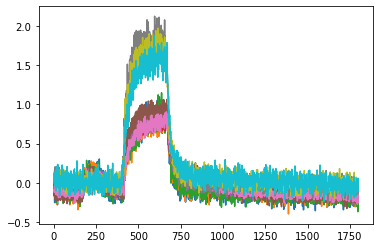

In [8]:
for roi in range(10):
    plt.plot(dffAll['GCaMP455'][3][roi])


In [9]:
# for k, v in dffAll.items(): # dffAll.items() for Python 3
#     print (k)
#     print (v.shape)
    

### dff frequency responses for all sensors

GCaMP7f
GCaMP456
GCaMP686
GCaMP688


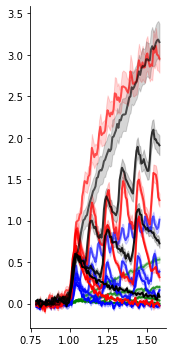

In [10]:
trialMap = {
            1: '1 Hz',
            2: '5 Hz',
            3: '10 Hz',
            4: '20 Hz',
            5: '40 Hz',
            6: '80 Hz',
            7: '160 Hz',
            8: '240 Hz',
            9: '320 Hz'
           }

# colorMap = {
#             'GCaMP7f': '#01ff00',
#             'GCaMP456': '#0000ff',
#             'GCaMP686': '#ff0000',
#             'GCaMP688': '#231f20',
#             'XCaMP': 'orange'
#            }



colorMap ={'GCaMP7f':'green',
                'GCaMP456':'blue',
                'GCaMP686':'red',
                'GCaMP688':'black',
                'XCaMP': 'orange'
          }


titlesMap = {
            'GCaMP7f': 'jGCaMP7f',
            'GCaMP456': 'jGCaMP8f',
            'GCaMP686': 'jGCaMP8m',
            'GCaMP688': 'jGCaMP8s',
            'XCaMP': 'XCaMP'
           }

# figOrders = ['GCaMP6s', 'GCaMP7b', 'GCaMP7c', 'GCaMP7f', 'GCaMP7s']
# figOrders = [u'GCaMP779', u'GCaMP783', u'GCaMP804', u'GCaMP834']
# figOrders = [u'GCaMP6f', u'GCaMP6s', u'GCaMP725', u'GCaMP734', u'GCaMP779', u'GCaMP783', u'GCaMP804', u'GCaMP834'] 
# figOrders = ['GCaMP456','GCaMP455','GCaMP7f']
# figOrders = ['GCaMP7f','GCaMP456','GCaMP455','GCaMP712','GCaMP543','GCaMP640','GCaMP688','GCaMP707','GCaMP686','XCaMP']
figOrders = ['GCaMP7f','GCaMP456','GCaMP686','GCaMP688']
# figOrders = ['GCaMP688']
# figOrders = ['codon optimized','non codon optimized']
# figOrders = ['GCaMP7f']
fig = plt.figure(figsize=(2.5,5))
# fig = plt.figure(figsize=(2.15,3))
subplotPos = 0
# for sensor, traces in dffAll.iteritems():

ax = plt.subplot(111)


for sensor in(figOrders):
    print(sensor)

    
#     if sensor=='GCaMP455' and trialNum==3:
#         print(np.std(rawAll[sensor][trialNum,roiNum,200:300])
    mean = np.mean(dffAll[sensor], axis = 1)
#     mean = np.mean(rawAll[sensor], axis = 1)

    sem = np.std(dffAll[sensor], axis = 1)/np.sqrt(dffAll[sensor].shape[1])
#     sem = np.std(rawAll[sensor], axis = 1)/np.sqrt(rawAll[sensor].shape[1])

    subplotPos += 1
#     if subplotPos <6:
#     ax = plt.subplot(1,4,subplotPos)

        
#     for trialNum in range(mean.shape[0]):
    q = []
#     for trialNum in range(7):
    for trialNum in range(4):
#         if trialNum == 1:
#             continue
        
#         ax.plot(np.arange(1, mean.shape[1] + 1)/params['frameInterval']-2.21, mean[trialNum], lw=2,
#                 label=trialMap[trialNum+1],color = colorMap[sensor],alpha=(7-trialNum/1.2)/7.0)
#         ax.fill_between(np.arange(1, mean.shape[1] + 1)/params['frameInterval']-2.21, mean[trialNum]-sem[trialNum],
#                         mean[trialNum]+sem[trialNum], color = colorMap[sensor],alpha=0.25*(7-trialNum/1.2)/7.0)
        
        
        
        
        ax.plot(np.arange(385,488)/params['frameInterval']-2.21, mean[trialNum][385:488], lw=2,
                label=trialMap[trialNum+1],color = colorMap[sensor],alpha=(7-trialNum/1.2)/7.0)
        ax.fill_between(np.arange(385,488)/params['frameInterval']-2.21, mean[trialNum][385:488]-
                        sem[trialNum][385:488],mean[trialNum][385:488]+sem[trialNum][385:488],
                        color = colorMap[sensor],alpha=0.25*(7-trialNum/1.2)/7.0)
    
#         ax.plot(np.arange(1, mean.shape[1] + 1), mean[trialNum], lw=1,
#                     label=trialMap[trialNum+1],color = colorMap[trialNum+1])
    
#         if sensor == 'GCaMP7f':
#         if sensor == 'non codon optimized':

        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# leg = ax.legend()
# leg = ax.legend(loc='upper right',bbox_to_anchor=(1.1,1), ncol=1) 
# leg.get_frame().set_linewidth(0.0)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# ax.set_title(titlesMap[sensor])

# ax.set_xlabel('Time (s)')
# #         if subplotPos == 1:
# ax.set_ylabel('\u0394F/F0')
#         ax.axis.label.set_color('#4B4B4B')
#     ax.set_ylim([-0.15, 0.2])
#     ax.set_ylim([-0.15, 12.5])
#     ax.set_ylim([-0.1, 2.5])

#     ax.set_xlim([3.2,3.8])
#     if sensor == 'GCaMP712':
# #     if sensor == 'non codon optimized':
#         y_lim = ax.get_ylim()
#     ax.set_ylim([-0.5,10])
# #     ax.set_xlim([2.5,8.5])
    
#     ax.set_xlim([660,680])
    
#     ax.set_ylim([-0.5,1.6])
#     ax.set_xlim([2.8,4.9])
#     ax.set_ylim([150,450])
    
# ax.set_ylim([-0.2, 9.0051329609305])
# ax.set_ylim([-0.1, 2.35])
# ax.set_xlim(a[300],a[1500]) 
# ax.set_xlim([0.8,1.6])
# ax.set_xlim([0,8])
#     if sensor=='GCaMP7f':
#         print(ax.get_ylim())
plt.tight_layout()
savePath = '/Users/zhengj10/Desktop/GENIE/Manuscript/jGCaMP8/fig.x/'
# fig.savefig('/Users/zhengj10/Desktop/figure_NMJ/686_1-10Hz.pdf',format='pdf')
# fig.savefig('/Users/zhengj10/Desktop/NMJ_imaging/688_1-10Hz.pdf',format='pdf')
# fig.savefig(savePath + '688_1-10Hz.pdf',format='pdf')

plt.show()



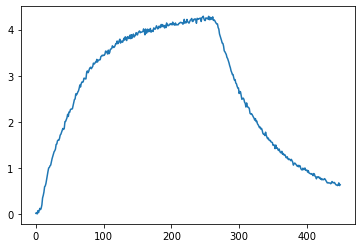

In [11]:
plt.plot(mean[3][405:855])


In [12]:
window = {
    1:128.5,
    5:25.7,
    10:12.85,
    20:6.425
}



### average of individual dFFs at 1-20 Hz

GCaMP7f
GCaMP456
GCaMP686
GCaMP688


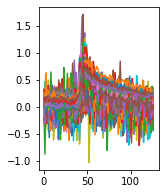

In [13]:
trialMap = {
            1: '1 Hz',
            2: '5 Hz',
            3: '10 Hz',
            4: '20 Hz',
            5: '40 Hz',
            6: '80 Hz',
            7: '160 Hz',
            8: '240 Hz',
            9: '320 Hz'
           }


colorMap ={'GCaMP7f':'green',
                'GCaMP456':'blue',
                'GCaMP686':'red',
                'GCaMP688':'black',
                'XCaMP': 'orange'
          }


titlesMap = {
            'GCaMP7f': 'jGCaMP7f',
            'GCaMP456': 'jGCaMP8f',
            'GCaMP686': 'jGCaMP8m',
            'GCaMP688': 'jGCaMP8s',
            'XCaMP': 'XCaMP'
           }


figOrders = ['GCaMP7f','GCaMP456','GCaMP686','GCaMP688']

fig = plt.figure(figsize=(2.15,3))
subplotPos = 0
# for sensor, traces in dffAll.iteritems():

ax = plt.subplot(111)

k = 1
Sensor = []
mean_dFF = []
dFF = []

for sensor in(figOrders):
    print(sensor)
    mean_dff = []
    for roi in range(dffAll[sensor].shape[1]):
        for stim in range(2*k):

            seg=dffAll[sensor][0][roi][415-int(window[k]*1/3)+int(stim*window[k]):415+int(window[k]*2/3)+int(stim*window[k])]
            individual_dff = np.max(seg)-np.min(seg)
            plt.plot(seg)
            mean_dff.append(individual_dff)
        mean_dFF.append(mean_dff)
        Sensor.append(sensor)
        dFF.append(mean_dFF)
        
    

In [14]:
dffAll[sensor][0].shape

(25, 1800)

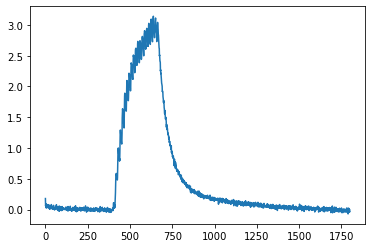

In [15]:
plt.plot(mean[2])

### SNR with raw data

In [16]:
df_sorted = df
sensorTypes = df_sorted.Sensor.unique()

rawAll = {}
f0All = {}

for sensorType in(sensorTypes):
    if sensorType in ['GCaMP456','GCaMP455','GCaMP543']:
        df_sensor = df_sorted[(df_sorted.Sensor == sensorType)&(df_sorted['Codon optimization'] == 'codon optimized')]
    else:
        df_sensor = df_sorted[df_sorted.Sensor == sensorType]
    
    rawList = []
    f0List = []
    for index, row in df_sensor.iterrows():

        if row['Date'] == 210112 and row['Larva_ID']=='Larva_2':
#             print(sensorType)
            continue
            
        matFile = os.path.join(imgPath, str(row['Date']), row['Larva_ID'], row['FOV_ID'], 'summary/_raw.mat')
        if not os.path.exists(matFile):
            print(sensorType)
            print("no mat file found!")
            continue
        rawSingleFOV = sio.loadmat(matFile)
        rawArray = rawSingleFOV['raw']

        rawList.append(rawArray)
        matFile = os.path.join(imgPath, str(row['Date']), row['Larva_ID'], row['FOV_ID'], 'summary/_f0.mat')
        f0SingleFOV = sio.loadmat(matFile)
        f0Array = f0SingleFOV['f0']
        f0List.append(f0Array)
    
    rawAllROIs = np.concatenate(rawList, axis=1)
    f0AllROIs = np.concatenate(f0List, axis=1)
    print (rawAllROIs.shape)
    rawAll[sensorType] = rawAllROIs
    f0All[sensorType] = f0AllROIs


(9, 27, 1800)
(9, 10, 1800)
(9, 21, 1800)
(9, 11, 1800)
(9, 9, 1800)
(9, 3, 1800)
(9, 25, 1800)
(9, 8, 1800)
(9, 25, 1800)
XCaMP
no mat file found!
(9, 4, 1800)


In [17]:
# fig = plt.figure(figsize=(12,8))
subplotPos = 0
figOrders = ['GCaMP7f','GCaMP456','GCaMP455','GCaMP712','GCaMP543','GCaMP640','GCaMP688','GCaMP707','GCaMP686','XCaMP']
# figOrders = ['GCaMP686']

SNR_all = {}
for sensor in(figOrders):
    SNR_all[sensor] = []
    SNR_mean_all = []
    SNR_sem_all = []
    for trialNum in range(rawAll[sensor].shape[0]):
        SNR = []
        for roiNum in range(rawAll[sensor].shape[1]):
            S = np.max(rawAll[sensor][trialNum,roiNum,400:700])-np.max(rawAll[sensor][trialNum,roiNum,200:300])
            N = np.std(rawAll[sensor][trialNum,roiNum,200:300])
            snr = S/N
            SNR.append(snr)
        SNR_mean = np.mean(SNR)
        SNR_sem = np.std(SNR)/np.sqrt(len(SNR))
        SNR_mean_all.append(SNR_mean)
        SNR_sem_all.append(SNR_sem)
    SNR_all[sensor].append(SNR_mean_all)
    SNR_all[sensor].append(SNR_sem_all)


In [18]:
# SNR_all

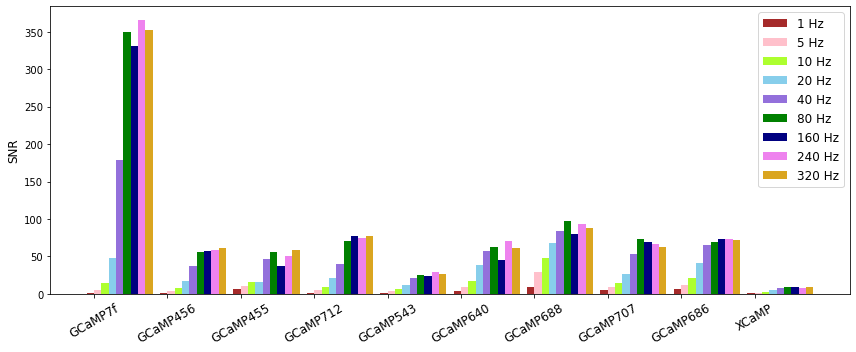

In [19]:
bars1 = []
bars2 = []
bars3 = []
bars4 = []
bars5 = []
bars6 = []
bars7 = []
bars8 = []
bars9 = []

sem1 = []
sem2 = []
sem3 = []
sem4 = []
sem5 = []
sem6 = []
sem7 = []
sem8 = []
sem9 = []

x_labels = []

for k,v in SNR_all.items():
    
    bars1.append(v[0][0])
    bars2.append(v[0][1])
    bars3.append(v[0][2])
    bars4.append(v[0][3])
    bars5.append(v[0][4])
    bars6.append(v[0][5])
    bars7.append(v[0][6])
    bars8.append(v[0][7])
    bars9.append(v[0][8])
    
    sem1.append(v[1][0])
    sem2.append(v[1][1])
    sem3.append(v[1][2])
    sem4.append(v[1][3])
    sem5.append(v[1][4])
    sem6.append(v[1][5])
    sem7.append(v[1][6])
    sem8.append(v[1][7])
    sem9.append(v[1][8])
    
    x_labels.append(k)
    
 
## set position of bar on X axis
barWidth = 0.1

u = 1

r1 = np.arange(len(bars1))
r2 = [x + barWidth*u for x in r1]
r3 = [x + barWidth*u for x in r2]
r4 = [x + barWidth*u for x in r3]
r5 = [x + barWidth*u for x in r4]
r6 = [x + barWidth*u for x in r5]
r7 = [x + barWidth*u for x in r6]
r8 = [x + barWidth*u for x in r7]
r9 = [x + barWidth*u for x in r8]

plt.figure(figsize=[12,5])

colorMap = {
            1: 'brown',
            2: 'pink',
            3: 'greenyellow',
            4: 'skyblue',
            5: 'mediumpurple',
            6: 'g',
            7: 'navy',
            8: 'violet',
            9: 'goldenrod'
           }

plt.bar(r1, bars1, color='brown', width=barWidth, label='1 Hz')
plt.bar(r2, bars2, color='pink', width=barWidth, label='5 Hz')
plt.bar(r3, bars3, color='greenyellow', width=barWidth, label='10 Hz')
plt.bar(r4, bars4, color='skyblue', width=barWidth, label='20 Hz')
plt.bar(r5, bars5, color='mediumpurple', width=barWidth, label='40 Hz')
plt.bar(r6, bars6, color='g', width=barWidth, label='80 Hz')
plt.bar(r7, bars7, color='navy', width=barWidth, label='160 Hz')
plt.bar(r8, bars8, color='violet', width=barWidth, label='240 Hz')
plt.bar(r9, bars9, color='goldenrod', width=barWidth, label='320 Hz')

plt.xlabel('')
plt.ylabel('SNR',size=12)
plt.xticks([r + barWidth/2 for r in range(len(bars1))], x_labels,size=12,rotation=30)
plt.legend(prop={"size":12})

# plt.ylim([0,100])

plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/SNR_bar.png')
plt.show()


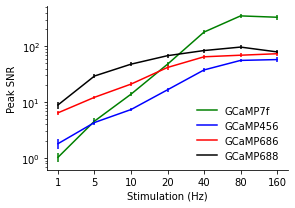

In [25]:
fig = plt.figure(figsize=[4.2,3])
figOrders = ['GCaMP7f','GCaMP456','GCaMP686','GCaMP688']

colorMap ={'GCaMP7f':'green',
                'GCaMP456':'blue',
                'GCaMP686':'red',
                'GCaMP688':'black',
                'XCaMP': 'orange'
          }

x = ['1','5','10','20','40','80','160']
# x = ['1','5','10','20','40']
ax = plt.subplot(111)

# for sensor in ['GCaMP455']:
# for sensor in SNR_all.keys():
for sensor in figOrders:
    ax.errorbar(x,SNR_all[sensor][0][:7],yerr=SNR_all[sensor][1][:7],fmt = '-',label=sensor,color=colorMap[sensor])
    leg = ax.legend(frameon=False)

    for item in leg.legendHandles: # remove error marker in legend
        item.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
ax.set_ylabel('Peak SNR')
ax.set_xlabel('Stimulation (Hz)')
ax.set_yscale('log')
# ax.set_ylim([-2,105])
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/SNR_line.pdf',format='pdf')

plt.show()


In [22]:
# SNR_all
figOrders

['GCaMP7f', 'GCaMP456', 'GCaMP686', 'GCaMP688']

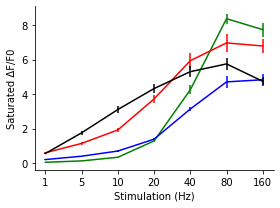

In [48]:
fig = plt.figure(figsize=[4,3])

x = ['1','5','10','20','40','80','160']
# x = ['a','b','c','d','e','f','g','h','i']
ax = plt.subplot(111)
dFF_peak = {}

sensors = []
dff_one_Hz = []


for sensor in(figOrders):
    dFF_peak[sensor] = {}
    dFF_peak[sensor]['mean'] = []
    dFF_peak[sensor]['sem'] = []
    for trialNum in range(dffAll[sensor].shape[0]):
#     for trialNum in range(1):
        dFF_peak_all_rois = []
        for roi in range(dffAll[sensor].shape[1]):
            dFF_peak_single_roi = np.max(dffAll[sensor][trialNum,roi,:])-np.max(dffAll[sensor][trialNum,roi,200:250])
            dFF_peak_all_rois.append(dFF_peak_single_roi)
            
            sensors.append(sensor)
            dff_one_Hz.append(dFF_peak_single_roi)
            
        dFF_peak_all_rois_mean = np.mean(dFF_peak_all_rois)
        dFF_peak_all_rois_sem = np.std(dFF_peak_all_rois)/np.sqrt(dffAll[sensor].shape[1])
        dFF_peak[sensor]['mean'].append(dFF_peak_all_rois_mean)
        dFF_peak[sensor]['sem'].append(dFF_peak_all_rois_sem)
    ax.errorbar(x,dFF_peak[sensor]['mean'][:7],yerr=dFF_peak[sensor]['sem'][:7],fmt = '-',label=sensor
               ,color=colorMap[sensor])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
ax.set_ylabel('Saturated \u0394F/F0')
ax.set_xlabel('Stimulation (Hz)')
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/210427/Peak_dFF_saturation.png')
# fig.savefig('/Users/zhengj10/Desktop/Peak_dFF_saturation.pdf',format='pdf')
plt.show()


In [49]:
figOrders

['GCaMP7f', 'GCaMP456', 'GCaMP686', 'GCaMP688']

In [50]:
df_dff = pd.DataFrame({'sensor':sensors,'dff_1_Hz':dff_one_Hz})



In [51]:
df_dff

,sensor,dff_1_Hz
0,GCaMP7f,0.022650
1,GCaMP7f,0.015720
2,GCaMP7f,0.021078
3,GCaMP7f,0.071399
4,GCaMP7f,0.041365
...,...,...
877,GCaMP688,2.726177
878,GCaMP688,2.993035
879,GCaMP688,2.907751
880,GCaMP688,2.840335


NameError: name 'colors' is not defined

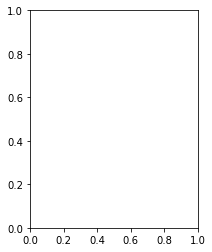

In [52]:
import seaborn as sns
fig = plt.figure(figsize=(3,4))
ax  = plt.subplot(111)
sns.swarmplot(x="sensor", y='dff_1_Hz', data=df_dff, ax = ax, size=6, dodge=True, alpha=0.4, palette=colors)
ax = sns.barplot(x="sensor", y='dff_1_Hz', data=df_dff, ax = ax, alpha=0.4, palette=colors,capsize=0.3)
# sb = sns.boxplot(x="Pipette", y=value, data=df, ax = ax, boxprops=dict(alpha=0.4),showfliers=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ylabel = value + ' (\u03BCm)'
# ax.set_ylabel(ylabel,size=12)
# ax.set_xlabel('Pipette #',size=12)

patches = ax.patches
lines_per_err = 3

for i, line in enumerate(ax.get_lines()):
    newcolor = patches[i // lines_per_err].get_facecolor()
    line.set_color(newcolor)
plt.xticks([0,1,2,3], ['jGCaMP7f','jGCaMP8f','jGCaMP8m','jGCaMP8s'], rotation=45, ha = 'right')
ax.set_xlabel('')
ax.set_ylabel('Saturated \u0394F/F0 1 Hz')

plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/F0.png')
# fig.savefig('/Users/zhengj10/Desktop/dff_1_Hz.pdf',format='pdf')
plt.show()


In [ ]:
colors

### F0 for all sensors

In [49]:
df = pd.DataFrame({'sensor':[],'f0':[]})
# for sensor in(figOrders):
#     df[sensor] = f0All[sensor][0]

In [50]:
sensors = []
f0_val = []

In [51]:
f0_data = {}

for sensor in(figOrders):
    for i in f0All[sensor][0,:]:
        sensors.append(sensor)
        f0_val.append(i)

In [52]:
df = pd.DataFrame({'sensor':sensors,'f0':f0_val})

In [53]:
df

,sensor,f0
0,GCaMP7f,284.59...
1,GCaMP7f,269.38...
2,GCaMP7f,260.60...
3,GCaMP7f,258.01...
4,GCaMP7f,247.56...
...,...,...
175,GCaMP688,185.38...
176,GCaMP688,189.39...
177,GCaMP688,203.08...
178,GCaMP688,207.05...


In [4]:
import seaborn as sns
fig = plt.figure(figsize=(3,4))
ax  = plt.subplot(111)
sns.swarmplot(x="sensor", y='f0', data=df, ax = ax, size=6, dodge=True, alpha=0.4, palette=colors)
ax = sns.barplot(x="sensor", y='f0', data=df, ax = ax, alpha=0.4, palette=colors,capsize=0.3)
# sb = sns.boxplot(x="Pipette", y=value, data=df, ax = ax, boxprops=dict(alpha=0.4),showfliers=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ylabel = value + ' (\u03BCm)'
# ax.set_ylabel(ylabel,size=12)
# ax.set_xlabel('Pipette #',size=12)

patches = ax.patches
lines_per_err = 3

for i, line in enumerate(ax.get_lines()):
    newcolor = patches[i // lines_per_err].get_facecolor()
    line.set_color(newcolor)
plt.xticks([0,1,2,3], ['jGCaMP7f','jGCaMP8f','jGCaMP8m','jGCaMP8s'], rotation=45, ha = 'right')
ax.set_xlabel('')
ax.set_ylabel('F0')

plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/F0.png')
# fig.savefig('/Users/zhengj10/Desktop/F0.pdf',format='pdf')
plt.show()


NameError: name 'plt' is not defined

In [3]:
colors

UsageError: %colors: you must specify a color scheme. See '%colors?'


In [71]:
colors = []
for k in colorMap:
    colors.append(colorMap[k])

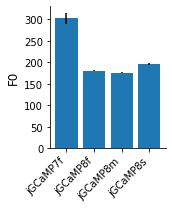

In [59]:
# fig = plt.figure(figsize=(4,3))
fig = plt.figure(figsize=(2.5,3))
f0Mean = []
f0Sem = []
for sensor in(figOrders):
    mean = np.mean(f0All[sensor][0,:])

#     print(mean.shape)
    sem = np.std(f0All[sensor][0,:])/np.sqrt(f0All[sensor].shape[1])

    f0Mean.append(mean)
    f0Sem.append(sem)
ax = plt.subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
y_pos = np.arange(1, len(figOrders)+1)
plt.xticks(y_pos, ['jGCaMP7f','jGCaMP8f','jGCaMP8m','jGCaMP8s'], rotation=45, ha = 'right')
# colors = ['k', 'y', 'm', 'c', 'g', 'r', 'b', 'brown']
# for xtick, color in zip(ax.get_xticklabels(), colors):
#     xtick.set_color(color)
ax.set_ylabel('F0', size=12)
# ax.set_ylim([100,a])
barlist = ax.bar(y_pos, f0Mean, yerr = f0Sem)


# barlist[0].set_color('k')
# barlist[1].set_color('y')
# barlist[2].set_color('m')
# barlist[3].set_color('c')
# barlist[4].set_color('g')
# barlist[5].set_color('r')
# barlist[6].set_color('b')
# barlist[7].set_color('brown')
# plt.rcParams["axes.labelweight"] = "light"
plt.tight_layout()
plt.show()
# fig.savefig(savePath + '/' + 'GCaMP_uf-GCaMP_1-320Hz_f0.png', dpi = 600)
# fig.savefig(savePath + '/' + 'GCaMP543_f0.png', dpi = 1200)



In [60]:
f0Sem

[12.214797331032608,
 1.8708612037257846,
 1.7075576170187234,
 1.8817296783388295]

In [61]:
a = ax.get_ylim()[1]
a

329.83697372650437

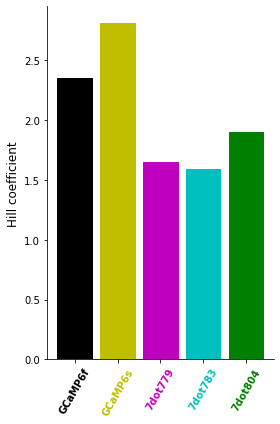

In [62]:
sensors = ['GCaMP6f','GCaMP6s','7dot779','7dot783','7dot804']

# Kd = [412.90,176.50,5399.00,3799.00,892.00]
# fMax = [3622,2813,2741,2754,3031]
# fMin = [66.82,26.41,92.28,98.68,60.71]
hill = [2.355,2.809,1.653,1.59,1.897]


fig = plt.figure(figsize=(4,6))
ax = plt.subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
y_pos = np.arange(1, len(dffAll)+1)
plt.xticks(y_pos, sensors, rotation=60, weight = 'bold')
colors = ['k', 'y', 'm', 'c', 'g']
for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)
    
# ax.set_ylabel('Kd(nM)', size=12)
# ax.set_ylabel('Fmax (F/mg/mL protein)', size=12)
# ax.set_ylabel('Fmin (F/mg/mL protein)', size=12)
ax.set_ylabel('Hill coefficient', size=12)

# barlist = ax.bar(np.arange(1,6), Kd)
# barlist = ax.bar(np.arange(1,6), fMax)
# barlist = ax.bar(np.arange(1,6), fMin)
barlist = ax.bar(np.arange(1,6), hill)


barlist[0].set_color('k')
barlist[1].set_color('y')
barlist[2].set_color('m')
barlist[3].set_color('c')
barlist[4].set_color('g')

plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show()


# fig.savefig(savePath + '/' + 'Kd.png', dpi = 1200)
# fig.savefig(savePath + '/' + 'fMax.png', dpi = 1200)
# fig.savefig(savePath + '/' + 'fMin.png', dpi = 1200)
# fig.savefig(savePath + '/' + 'hill.png', dpi = 1200)



### Compute the half rise time and half decay time

In [13]:
def computeHR(A): # A is all dffTraces with 393 total frames (12 frames deleted from raw)
    trace20Hz = A[0,:,:]
    idxList = []
    idxPeakList = []
    hfriseList = []
    for roi in range(trace20Hz.shape[0]):
        trace = trace20Hz[roi, :]## Must use store the data in another variable othersise np.abs does not work!
        peak = np.max(trace)
        idxPeak = (np.abs(trace-peak)).argmin()

        median = peak/2.0
        idxMedian = (np.abs(trace[:idxPeak]-median)).argmin()
        print(idxMedian)
        hfrise = (idxMedian-416)/128.5
#         hfrise = idxMedian/131.58 - 3.5278
        idxList.append(idxMedian)
        idxPeakList.append(idxPeak)
        hfriseList.append(hfrise)     
    return idxList, idxPeakList, hfriseList


In [14]:
# def computeHR(A): # A is all dffTraces with 393 total frames (12 frames deleted from raw)
#     trace20Hz = A[6,:,:]
#     idxList = []
#     idxPeakList = []
#     hfriseList = []
#     for roi in range(trace20Hz.shape[0]):
#         trace = trace20Hz[roi, :] ## Must use store the data in another variable othersise np.abs does not work!
#         peak = np.max(trace)
#         idxPeak = (np.abs(trace-peak)).argmin()
#         median = peak/2.0
#         idxMedian = (np.abs(trace[:idxPeak]-median)).argmin()
#         frameCount = idxMedian - (int(3.5278 * 30.303)-12)
#         hfrise = frameCount/30.303
#         idxList.append(idxMedian)
#         idxPeakList.append(idxPeak)
#         hfriseList.append(hfrise)     
#     return idxList, idxPeakList, hfriseList


In [15]:
def computeHD(A): # A is all dffTraces with 393 total frames (12 frames deleted from raw)
    trace20Hz = A[0,:,:]
#     traceStartFrame = int(5.5278 * 131.58 - 12) # Get the frame # when the stimulation ends
#     print traceStartFrame
#     traceStartFrame = 673
    traceStartFrame = 418
#     decayTrace = trace20Hz[:, traceStartFrame:traceStartFrame+500] # If use all the data 
    decayTrace = trace20Hz[:, traceStartFrame:traceStartFrame+85]
    idxList = []
    hfdecayList = []
    for roi in range(decayTrace.shape[0]):
        trace = decayTrace[roi, :] ## Must use store the data in another variable othersise np.abs does not work!
        value = trace[0]/2.0
#         print trace[0]
        idx = (np.abs(trace-value)).argmin()
        halfDecay = idx/128.5
        idxList.append(idx)
        hfdecayList.append(halfDecay)     
    return idxList, hfdecayList


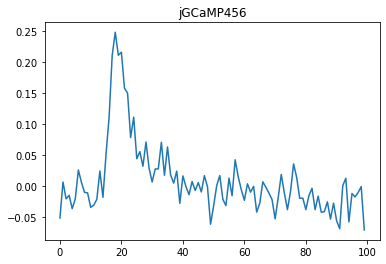

In [16]:
plt.plot(np.mean(dffAll['GCaMP456'][0,:,:],axis=0)[400:500])
plt.title('jGCaMP456')
plt.savefig('/Users/zhengj10/Desktop/456_mean.png')
plt.show()

In [17]:
sensors = []
# hr_val = []
hd_val = []
figOrders = ['GCaMP7f','GCaMP456','GCaMP686','GCaMP688']
for sensor in(figOrders):
#     idxList, idxPeakList, hfriseList = computeHR(dffAll[sensor])
    idxList, hfdecayList = computeHD(dffAll[sensor])
    for i in hfdecayList:
        sensors.append(sensor)
        hd_val.append(i)
        

In [18]:
df = pd.DataFrame({'sensor':sensors,'hd':hd_val})

In [19]:
df

,sensor,hd
0,GCaMP7f,0.015564
1,GCaMP7f,0.046693
2,GCaMP7f,0.311284
3,GCaMP7f,0.575875
4,GCaMP7f,0.194553
...,...,...
93,GCaMP688,0.326848
94,GCaMP688,0.319066
95,GCaMP688,0.311284
96,GCaMP688,0.155642


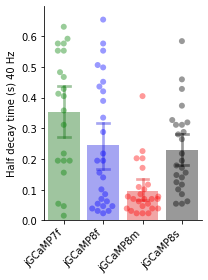

In [23]:
import seaborn as sns

fig = plt.figure(figsize=(3,4))
ax  = plt.subplot(111)
sns.swarmplot(x="sensor", y='hd', data=df, ax = ax, size=6, dodge=True, alpha=0.4, palette=colors)
ax = sns.barplot(x="sensor", y='hd', data=df, ax = ax, alpha=0.4, palette=colors,capsize=0.3)
# sb = sns.boxplot(x="Pipette", y=value, data=df, ax = ax, boxprops=dict(alpha=0.4),showfliers=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ylabel = value + ' (\u03BCm)'
# ax.set_ylabel(ylabel,size=12)
# ax.set_xlabel('Pipette #',size=12)

patches = ax.patches
lines_per_err = 3

for i, line in enumerate(ax.get_lines()):
    newcolor = patches[i // lines_per_err].get_facecolor()
    line.set_color(newcolor)
plt.xticks([0,1,2,3], ['jGCaMP7f','jGCaMP8f','jGCaMP8m','jGCaMP8s'], rotation=45, ha = 'right')
ax.set_xlabel('')
ax.set_ylabel('Half decay time (s) 40 Hz')

plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/hr.png')
# fig.savefig('/Users/zhengj10/Desktop/hd.pdf',format='pdf')
plt.show()


In [22]:
colors = ['g','b','r','k']

In [74]:
fig = plt.figure(figsize=(3,4))
# hfriseMean = []
# hfriseSem = []
# figOrders = ['GCaMP7f','GCaMP456','GCaMP455','GCaMP712','GCaMP543','GCaMP640','GCaMP688','GCaMP707','GCaMP686','XCaMP']

# for sensor in(figOrders):
# #     idxList, idxPeakList, hfriseList = computeHR(dffAll[sensor][:,:,params['shutterCloseFrames']:])
#     idxList, idxPeakList, hfriseList = computeHR(dffAll[sensor])
#     mean = np.mean(hfriseList)
#     sem = np.std(hfriseList)/(len(hfriseList)-1)
#     hfriseMean.append(mean)
#     hfriseSem.append(sem)
    

hr_data = {}

for sensor in(figOrders):
    idxList, idxPeakList, hfriseList = computeHR(dffAll[sensor])
    for i in hfriseList[sensor]:
        sensors.append(sensor)
        hr_val.append(i)
        
        
        
ax = plt.subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
y_pos = np.arange(1, len(figOrders)+1)
plt.xticks(y_pos, figOrders, rotation=45, ha = 'right' )
# colors = ['k', 'y', 'm', 'c', 'g', 'r', 'b', 'brown']
# for xtick, color in zip(ax.get_xticklabels(), colors):
#     xtick.set_color(color)
ax.set_ylabel('Half rise time (s) 80 Hz')
barlist = ax.bar(y_pos, hfriseMean, yerr = hfriseSem,color=colors)
# barlist[0].set_color('k')
# barlist[1].set_color('y')
# barlist[2].set_color('m')
# barlist[3].set_color('c')
# barlist[4].set_color('g')
# barlist[5].set_color('r')
# barlist[6].set_color('b')
# barlist[7].set_color('brown')
plt.rcParams["axes.labelweight"] = "light"
plt.tight_layout()
plt.show()
# fig.savefig('/Users/zhengj10/Desktop/210427/uf-GCaMP_hr.png')


513
513
517
517
506
522
493
509
509
524
523
519
527
516
531
527
467
465
472
466
471


TypeError: list indices must be integers or slices, not str

<Figure size 216x288 with 0 Axes>

In [75]:
len(y_pos)

10

In [76]:
figOrders

['GCaMP7f', 'GCaMP456', 'GCaMP686', 'GCaMP688']

NameError: name 'hfriseSem' is not defined

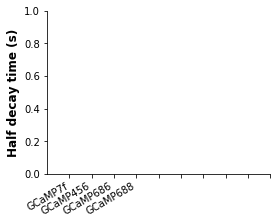

In [77]:
fig = plt.figure(figsize=(4,3))
hfdecayMean = []
hfdecaySem = []
for sensor in(figOrders):
    idxList, hfdecayList = computeHD(dffAll[sensor])
    mean = np.mean(hfdecayList)
    sem = np.std(hfdecayList)/(len(hfriseList)-1)
    hfdecayMean.append(mean)
    hfdecaySem.append(sem)
ax = plt.subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
y_pos = np.arange(1, len(dffAll)+1)
plt.xticks(y_pos, figOrders, rotation = 30, ha = 'right')
# colors = ['k', 'y', 'm', 'c', 'g', 'r', 'b', 'brown']
# for xtick, color in zip(ax.get_xticklabels(), colors):
#     xtick.set_color(color)
ax.set_ylabel('Half decay time (s)', size=12)
barlist = ax.bar(y_pos, hfdecayMean, yerr = hfriseSem)
# barlist[0].set_color('k')
# barlist[1].set_color('y')
# barlist[2].set_color('m')
# barlist[3].set_color('c')
# barlist[4].set_color('g')
# barlist[5].set_color('r')
# barlist[6].set_color('b')
# barlist[7].set_color('brown')
plt.rcParams["axes.labelweight"] = "light"
plt.tight_layout()
plt.show()
# fig.savefig(savePath + '/' + 'uf-GCaMP_1-320Hz_hd.png', dpi = 600)


### Comparison of GCaMP6s and GCaMP7s at 1Hz

In [ ]:
# figPos = 0
# sensors = ['GCaMP6s', 'GCaMP7s']
# fig = plt.figure(figsize=(len(sensors)*3, 4))
# ax = plt.subplot(1, 3, 1)
# ax.plot([8,8,10], [0.04,-0.01,-0.01], color='k', lw=1)
# ax.set_xlim([-0.51315, 11.50215])
# ax.set_ylim([-0.08253471782803537, 0.19322907438874246])

# ax.axis('off')

# # (-0.51315, 11.50215) xlim in trace plot
# # (-0.125, 0.14000000000000001) ylim in trace plot
# for sensor in(sensors):
#     figPos += 1
#     trace = dffAll[sensor]
# #     ax_sb = plt.subplot(1, len(sensors)+1, figPos)
# #     ax_sb.plot(np.arange(1, trace.shape[2] + 1 -params['truncatedFrames'])/params['frameRate'], np.zeros(trace.shape[2]- params['truncatedFrames']), lw = 0)
# #     ax_sb.plot([-2, -2, 0], [0.05, -0.05, -0.05], color = 'k')
# #     ax_sb.axis('off')
# #     ax_sb.set_ylim([-0.075, 0.19])
#     ax = plt.subplot(1, len(sensors)+1, figPos+1)
    

#     for roi in range(trace.shape[1]):
#         if sensor == 'GCaMP6s' and np.max(trace[0, roi, :]) > 0.05: # Use this code only if no. of badrois equals 1
#             badRoi = roi
#             continue
#         if sensor == 'GCaMP6s':
#             ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, trace[0, roi, params['truncatedFrames']:], lw=0.7, color = 'lightgrey')
#         else:
#             ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames'])* params['frameInterval'] / 1000, trace[0, roi, params['truncatedFrames']:], lw=0.7, color = 'pink')
#         ax.set_title(sensor)

#     if sensor == 'GCaMP6s':
        
#         trace = np.delete(trace, badRoi, axis=1)
#         roi -= 1
#         ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, np.mean(trace[0, :, params['truncatedFrames']:], axis = 0), lw=1, color = 'k')
#     else:
#         ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, np.mean(trace[0, :, params['truncatedFrames']:], axis = 0), lw=1, color = 'r')
#     ax.plot([1, 1], [-0.04, -0.07], color = 'k', lw = 1)
#     ax.plot([2, 2], [-0.04, -0.07], color = 'k', lw = 1)
#     ax.axis('off')
#     ax.set_ylim([-0.08253471782803537, 0.19322907438874246])
#     ax.set_xlim([-0.51315, 11.50215])
# # plt.tight_layout()
# plt.show()
# # print ax.get_xlim()
# # print ax.get_ylim()

# # fig.savefig('/Users/zhengj10/Desktop/data/dff_1Hz_VK00005.png', dpi = 1200)


In [ ]:
# figPos = 0
# sensors = ['GCaMP6s', 'GCaMP7s']
# fig = plt.figure(figsize=(len(sensors)*3, 4))
# ax = plt.subplot(1, 3, 1)
# ax.plot([8,8,10], [0,-0.05,-0.05], color='k', lw=1)
# ax.set_xlim([-0.51315, 11.50215])
# ax.set_ylim([-0.08253471782803537, 0.19322907438874246])

# ax.axis('off')

# # (-0.51315, 11.50215) xlim in trace plot
# # (-0.125, 0.14000000000000001) ylim in trace plot
# for sensor in(sensors):
#     figPos += 1
#     trace = dffAll[sensor]
# #     ax_sb = plt.subplot(1, len(sensors)+1, figPos)
# #     ax_sb.plot(np.arange(1, trace.shape[2] + 1 -params['truncatedFrames'])/params['frameRate'], np.zeros(trace.shape[2]- params['truncatedFrames']), lw = 0)
# #     ax_sb.plot([-2, -2, 0], [0.05, -0.05, -0.05], color = 'k')
# #     ax_sb.axis('off')
# #     ax_sb.set_ylim([-0.075, 0.19])
#     ax = plt.subplot(1, len(sensors)+1, figPos+1)
    

#     for roi in range(trace.shape[1]):
#         ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, trace[0, roi, params['truncatedFrames']:], lw=0.7, color = 'lightgrey')
        
#     ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, np.mean(trace[0, :, params['truncatedFrames']:], axis = 0), lw=1, color = 'k')    
#     ax.set_title(sensor)

#     ax.plot([1, 1], [-0.04, -0.07], color = 'k', lw = 1)
#     ax.plot([2, 2], [-0.04, -0.07], color = 'k', lw = 1)
#     ax.axis('off')
#     ax.set_ylim([-0.08253471782803537, 0.19322907438874246])
#     ax.set_xlim([-0.51315, 11.50215])
# # plt.tight_layout()
# plt.show()
# # print ax.get_xlim()
# # print ax.get_ylim()

# # fig.savefig('/Users/zhengj10/Desktop/data/dff_1Hz.png', dpi = 1200)


### Report generation

In [ ]:
fov_col = df_sorted.groupby('Sensor').count()['FOV_ID'] # No. of FOVs
larva_col = df_sorted.groupby(['Sensor', 'Date', 'Larva_ID']).count().groupby('Sensor').count()['GenoType'] # No. of larvae
bouton_col = df_sorted.groupby('Sensor').sum()['No_boutons'] # No. of ROIs (Ib buttons)
df_summary = pd.DataFrame({'Sensor': fov_col.index, 'No_larvae': larva_col.values, 'No_FOV': fov_col.values, 'No_boutons':bouton_col.values}, columns = ['Sensor', 'No_larvae', 'No_FOV', 'No_boutons'])
df_summary.index = np.arange(1, len(df_summary)+1)
df_summary.to_excel('/Users/zhengj10/Desktop/uf-GCaMP_1-320Hz_summary_report.xlsx')
df_summary


In [ ]:
qq = df_sorted.groupby('Sensor').count()['FOV_ID']

In [ ]:
# df_allGT = pd.DataFrame(columns = ['GenoType', 'LS', 'Sensor', 'No_larvae', 'No_FOV', 'No_buttons'])

# for ls in ['su(Hw)attP5', 'su(Hw)attP8', 'VK00005']:

#     df_sorted = df[df.Father_line_landing_site==ls]
#     a = df_sorted.groupby('Sensor')
#     b = a.GenoType.value_counts()
#     c = b.unstack(level=0)
#     fov_col = df_sorted.groupby('Sensor').count()['FOV_ID'] # No. of FOVs
#     larva_col = df_sorted.groupby(['Sensor', 'Date', 'Larva_ID']).count().groupby('Sensor').count()['GenoType'] # No. of larvae
#     button_col = df_sorted.groupby('Sensor').sum()['No_buttons'] # No. of ROIs (Ib buttons)
#     df_summary = pd.DataFrame({'GenoType': c.index, 'LS': df_sorted.Father_line_landing_site[:len(fov_col)], 'Sensor': fov_col.index, 'No_larvae': larva_col.values, 'No_FOV': fov_col.values, 'No_buttons':button_col.values}, columns = ['GenoType', 'LS', 'Sensor', 'No_larvae', 'No_FOV', 'No_buttons'])
#     df_allGT = df_allGT.append(df_summary, ignore_index = True)

# # df = pd.read_excel(imgPath + 'summary.xlsx', index_col = 0)
# # df_new = pd.DataFrame(sessionInfo, columns = list(df), index = ['i',]) # columns specification keep the order of columns; index specification makes sure dict keys are the columns 
# # df = df.append(df_new, ignore_index = True)
# # df.index = np.arange(1, len(df)+1)
# df_allGT.index = np.arange(1, len(df_allGT)+1)
# df_allGT


In [ ]:
# df_allGT.to_excel('/Users/zhengj10/Desktop/summary.xlsx')

### Stylize table

In [ ]:
# import six

# # df = pd.DataFrame()
# # df['date'] = ['2016-04-01', '2016-04-02', '2016-04-03']
# # df['calories'] = [2200, 2100, 1500]
# # df['sleep hours'] = [2200, 2100, 1500]
# # df['gym'] = [True, False, False]


# def render_mpl_table(data, col_width=5.0, row_height=0.6, font_size=14,
#                      header_color='#353535', row_colors=['#f1f1f2', 'w'], edge_color='w',
#                      bbox=[0, 0, 1, 1], header_columns=0,
#                      ax=None, **kwargs):
#     if ax is None:
#         size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
#         fig, ax = plt.subplots(figsize=size)
#         ax.axis('off')

#     mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

#     mpl_table.auto_set_font_size(False)
#     mpl_table.set_fontsize(font_size)

#     for k, cell in  six.iteritems(mpl_table._cells):
#         cell.set_edgecolor(edge_color)
#         if k[0] == 0 or k[1] < header_columns:
#             cell.set_text_props(weight='bold', color='w')
#             cell.set_facecolor(header_color)
#         else:
#             cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
#     return ax
# # render_mpl_table(df, header_columns=0, col_width=2.0)


In [ ]:
# sumTable = render_mpl_table(df_allGT, header_columns=0, col_width=2.0)


In [78]:
from scipy import fftpack
import numpy as np
def normalized_fourier_transform(cdata):
        #cdata = intensity data over time
        #N = (end_time - start_time)*sampling_rate # array size
        #print('length of cdata', str(len(cdata)))
        N = len(cdata)
        X=fftpack.fft(cdata)
        #print('length of x:' + str(len(X)))
        y = 2/N * np.abs(X[0:np.int(N/2)]) # positive freqs only
        T = 1/128.5 # inverse of the sampling rate
        x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
        #print('x length:', str(len(x)))
        #print('y length:', str(len(y)))
        y = np.abs(y)/np.sum(np.abs(y))
        return x, y

In [79]:
dffAll[sensor][1][0].shape

(1800,)

In [80]:
freqs, power =  normalized_fourier_transform(dffAll[sensor][1][0][410:650])

(0, 0.06)

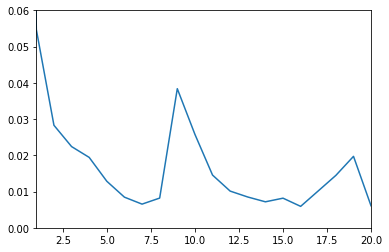

In [81]:
plt.plot(power)
plt.xlim([1,20])
plt.ylim([0,0.06])

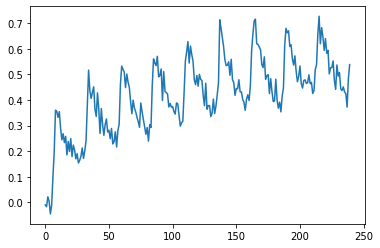

In [82]:
plt.plot(dffAll[sensor][1][0][410:650])

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

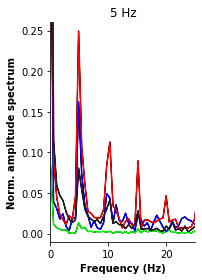

In [116]:
figOrders = ['GCaMP7f','GCaMP456','GCaMP686','GCaMP688']
fig = plt.figure(figsize=[3,4])
import scipy.fftpack
N = 240
# sample spacing
T = 1.0 / 128.5
x = np.linspace(0, N*T, N)
ax = plt.subplot(111)
trial = 1
for sensor in figOrders:
    yf_sensor = []
    for roi in range(dffAll[sensor][trial].shape[0]):
        y = dffAll[sensor][trial][0][410:650]
        yf = scipy.fftpack.fft(y)
        xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
        yf_sensor.append(yf)
    yf = np.mean(yf_sensor,axis=0)
    yf_sem = np.std(yf_sensor,axis=0)
    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]), color=colorMap[sensor])
    ax.fill_between(xf, (2.0/N * np.abs(yf[:N//2]))+(2.0/N * np.abs(yf_sem[:N//2])),
                    (2.0/N * np.abs(yf[:N//2]))-(2.0/N * np.abs(yf_sem[:N//2])),
                    color = 'k',alpha=1)

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Norm. amplitude spectrum')
# ax.set_ylim([-0.01,0.17])
ax.set_ylim([-0.01,0.26])
ax.set_xlim([0,25])
# ax.set_xlim([0,50])
ax.set_title('5 Hz')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/210427/power_20Hz.png')
fig.savefig('/Users/zhengj10/Desktop/power_5Hz.pdf',format='pdf')
plt.show()


In [247]:
# np.linspace(0.0,0.5,100.0)

In [414]:
dffAll['GCaMP688'][0].shape

(25, 1800)

In [422]:
yf_sem

array([0.00000000e+00, 3.55271368e-15, 9.93013661e-16, 2.22044605e-15,
       2.22044605e-15, 9.93013661e-16, 8.88178420e-16, 8.00593208e-16,
       4.47545209e-16, 8.88178420e-16, 8.88178420e-16, 1.11022302e-16,
       1.48952049e-15, 8.95090418e-16, 1.11022302e-16, 3.14018492e-16,
       6.28036983e-16, 0.00000000e+00, 5.23691153e-16, 2.70128921e-15,
       1.11022302e-16, 4.47545209e-16, 4.57756680e-16, 7.44760246e-16,
       2.22044605e-16, 4.96506831e-16, 1.14439170e-16, 6.47365705e-16,
       1.33688556e-15, 1.11022302e-16, 2.23772605e-16, 3.33716795e-16,
       6.93889390e-17, 2.00148302e-16, 0.00000000e+00, 8.32667268e-17,
       1.11022302e-16, 2.28878340e-16, 2.48253415e-16, 3.33066907e-16,
       1.66533454e-16, 1.57009246e-16, 6.93889390e-17, 3.51083347e-16,
       1.57009246e-16, 1.75541673e-16, 4.71027738e-16, 6.66133815e-16,
       1.11022302e-16, 1.18571871e-16, 2.22044605e-16, 1.00074151e-16,
       1.86190061e-16, 2.98936698e-16, 2.48253415e-16, 4.96506831e-16,
      